In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_diabetes, load_wine

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import statsmodels.api as sm

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.tree import export_graphviz
import graphviz

# 1. Decision Tree

+ Graphviz
    - http://www.graphviz.org
    - pip install graphviz
    
    
+ 일련의 질문에 근거하여 주어진 데이터를 분류하는 알고리즘
+ 설명하기 좋은 알고리즘
+ 과적합이 거의 필수적으로 발생

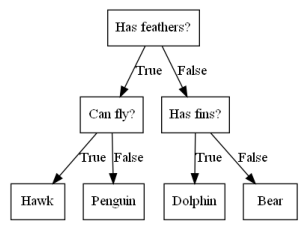

In [4]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"

mglearn.plots.plot_animal_tree()

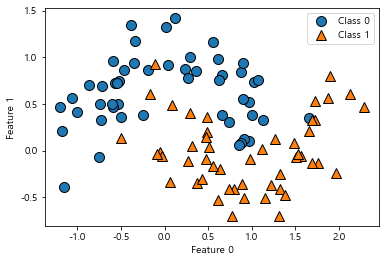

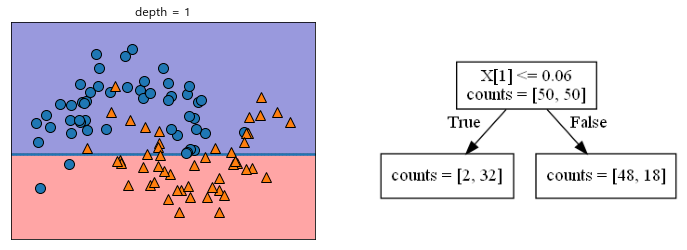

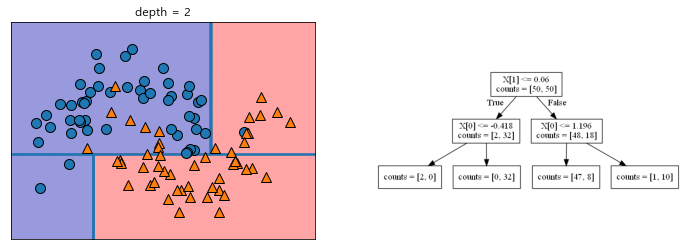

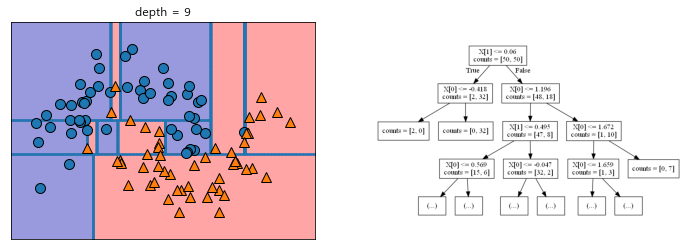

In [5]:
mglearn.plots.plot_tree_progressive()

### (1) 간단한 예

In [7]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size=0.2)
dt_clf = DecisionTreeClassifier(random_state=155).fit(X_train, y_train)

In [9]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

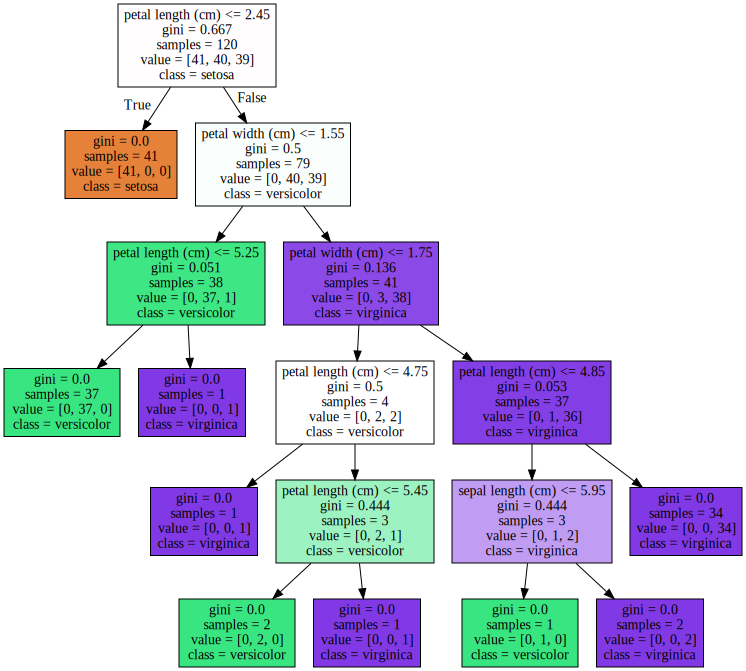

In [10]:
import graphviz

f = open("data/tree.dot")
graphviz.Source(f.read())

In [12]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8666666666666667


### (2) 과적합 해소를 위한 복잡도 제어 : Prunning(가지치기)

+ 종류
    - 사전 가지치기
    - 사후 가지치기
    - sklearn에서는 사후 가지치기만 지원
    
+ 파라미터
    - min_samples_split
    - min_samples_leaf
    - max_features
    - max_depth
    - max_leaf_nodes

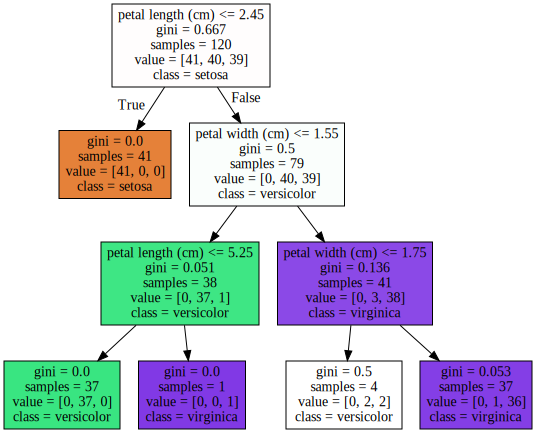

In [13]:
##### max_depth
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size=0.2)
dt_clf = DecisionTreeClassifier(random_state=155, max_depth=3).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

In [14]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  0.975
테스트 정확도 :  0.9333333333333333


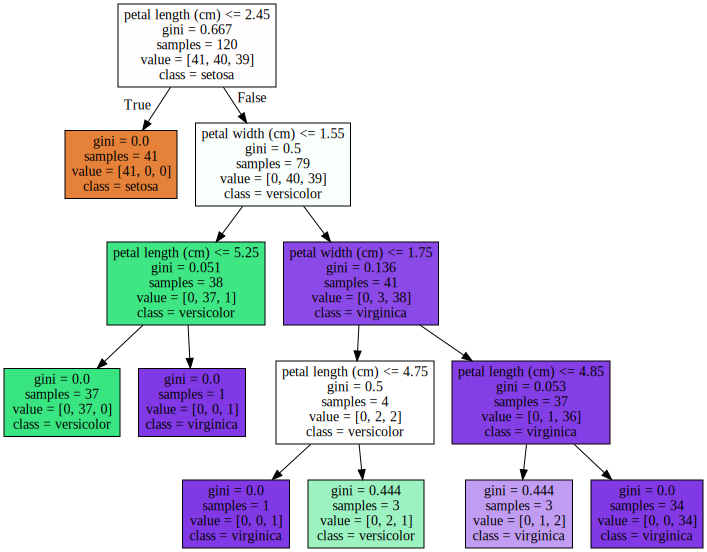

In [15]:
##### min_samples_split : 분할하기 위한 최소한의 샘플 수

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size=0.2)
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

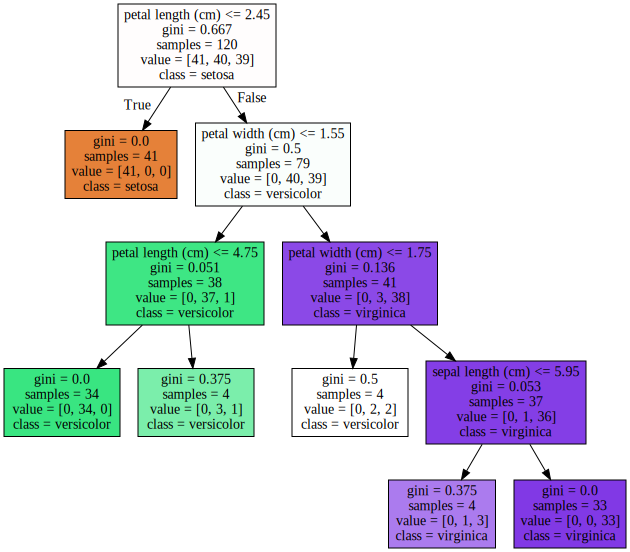

In [7]:
##### min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 수

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size=0.2)
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

### (3) 성능 개선

#### 1) 특성 중요도

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size=0.2)
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

In [8]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9333333333333333


In [11]:
dir(dt_clf)
print(dt_clf.feature_importances_)
print(iris.feature_names)

[0.00594727 0.         0.5459484  0.44810433]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<AxesSubplot:>

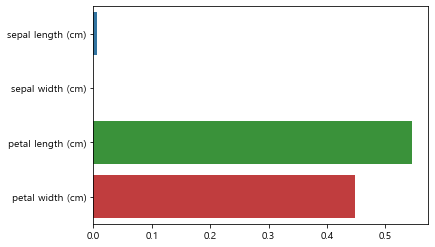

In [12]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

#### 2) 특성 중요도를 통해 추출한 특성만을 사용했을 때의 성능 개선 효과

In [13]:
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


#### 3) breast cancer sample

In [16]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42,
                                                   stratify=cancer.target)

In [21]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

In [22]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


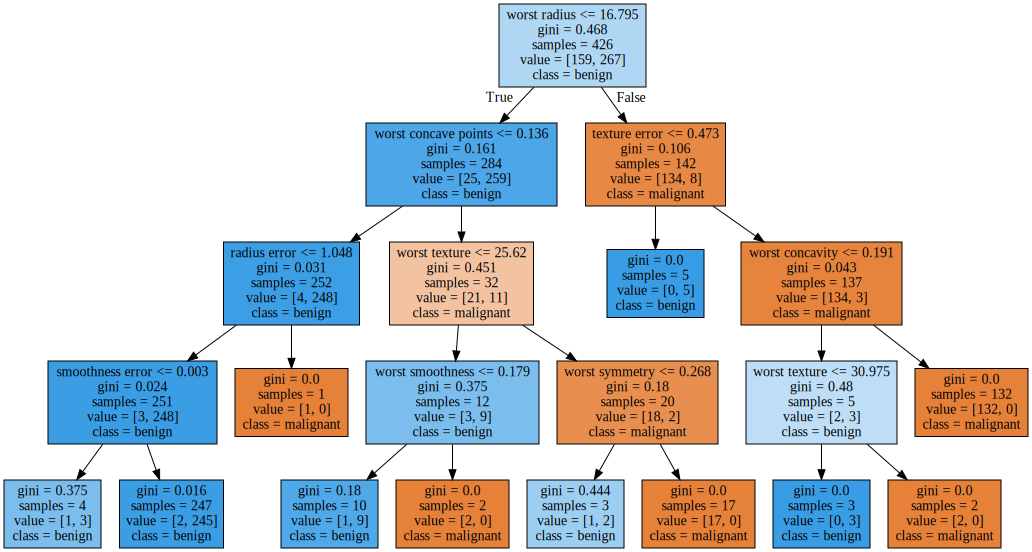

In [23]:
export_graphviz(tree, out_file="data/tree.dot", class_names=cancer.target_names,
               feature_names=cancer.feature_names, filled=True)

f = open("data/tree.dot")
graphviz.Source(f.read())

In [25]:
#print(tree.feature_importances_)
#print(cancer.feature_names)

for name, value in zip(cancer.feature_names, tree.feature_importances_):
    print(name, value)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


<AxesSubplot:>

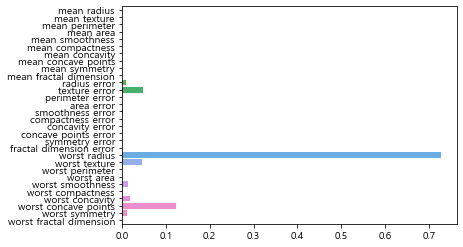

In [26]:
sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

### (4) 서울 지역 동 분류

+ 서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [27]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [28]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [30]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [31]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [32]:
##### 현재 가지고 있는 데이터에서 레이블의 갯수 확인
print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangdong    5
Gangnam     5
Gangseo     5
Gangbuk     5
Name: label, dtype: int64
Gangdong    5
Gangnam     5
Gangseo     5
Gangbuk     5
Name: label, dtype: int64


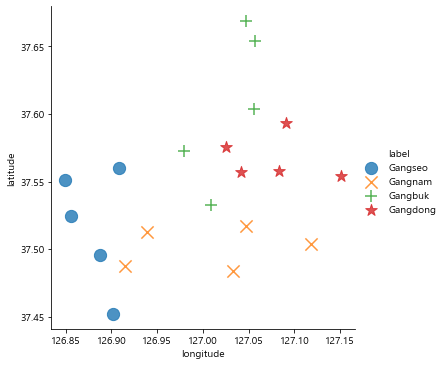

In [37]:
##### 데이터 시각화
sns.lmplot("longitude", "latitude", data=train_df, fit_reg=False, hue="label",
          markers=["o", "x", "+", "*"], scatter_kws={"s":150})

In [38]:
##### 훈련에 필요없는 구이름과 동이름 삭제
train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"], axis=1, inplace=True)

In [40]:
train_df
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [41]:
X_train = train_df[["latitude", "longitude"]]
y_train = train_df[["label"]]

X_test = test_df[["latitude", "longitude"]]
y_test = test_df[["label"]]

In [42]:
##### Label을 숫자로 변환
le = LabelEncoder()
y_enc = le.fit_transform(y_train)
y_enc

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [49]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_enc)

In [50]:
pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, le.classes_[pred]))

정확도 :  1.0


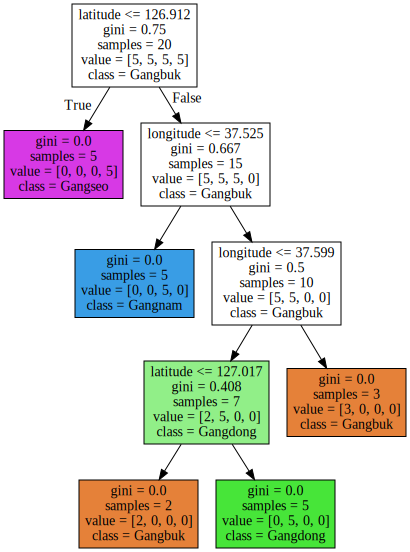

In [53]:
graph = export_graphviz(clf, out_file=None, class_names=["Gangbuk", "Gangdong", "Gangnam", "Gangseo"],
               feature_names=["longitude", "latitude"], filled=True)

graphviz.Source(graph)

# 2. RandomForest

### Ensemble

    - Vote 방식
        - Soft Voting
        - Hard Voting
    
    
    - 종류
        - Voting
            - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
            - 같은 데이터셋에서 서로 다른 알고리즘을 가진 분류기를 결합
        
        - Bagging(Bootstrap Aggregating)
            - 서로 다른 샘플 데이터에서 각각의 분류기가 모두 같은 유형의 알고리즘을 기반
            - RandomForest
        
        - Boosting(Adaptive Boosting, Gradient Boosting)
            - 여러 개의 분류기가 순차적으로 학습을 하되, 앞에서 학습한 분류기가 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
            - Gradient Boosting
            - XGBoost, Light GBM, Stacking, ...

In [56]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [58]:
forest = RandomForestClassifier(random_state=2, n_estimators=5).fit(X_train, y_train)

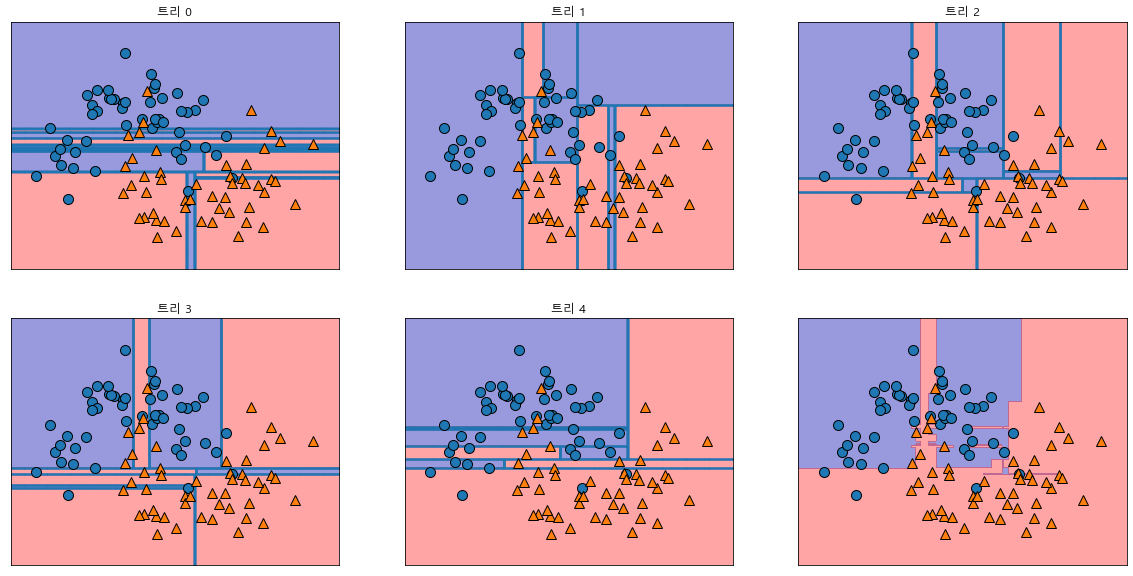

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### (1) DecisionTree vs. RandomForest

In [2]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [3]:
model1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.76


In [4]:
model2 = RandomForestClassifier(random_state=0, n_estimators=5).fit(X_train, y_train)

print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  0.9866666666666667
테스트 정확도 :  0.88


---

In [9]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state=0, stratify=cancer.target)

In [10]:
model1 = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  0.9765258215962441
테스트 정확도 :  0.916083916083916


<AxesSubplot:>

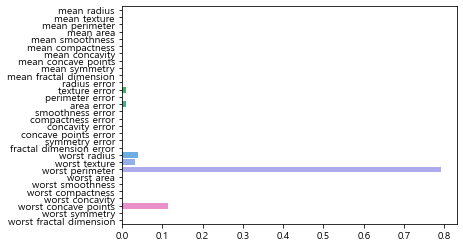

In [11]:
sns.barplot(x=model1.feature_importances_, y=cancer.feature_names)

In [12]:
model2 = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  0.9976525821596244
테스트 정확도 :  0.9440559440559441


<AxesSubplot:>

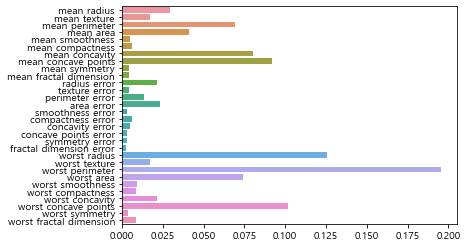

In [13]:
sns.barplot(x=model2.feature_importances_, y=cancer.feature_names)

---

In [16]:
mnist = load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [17]:
X, y = mnist.data, mnist.target

In [19]:
##### 교차 검증을 위한 공용 함수

def cross_validation(clf, features, labels):
    cv_scores=[]
    
    for i in range(10):
        scores = cross_val_score(clf, features, labels, cv=10, scoring="accuracy")
        cv_scores.append(scores.mean())
        
    return cv_scores

In [20]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(), X, y)

In [22]:
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))

0.8268544382371198
0.9486284916201116


<AxesSubplot:>

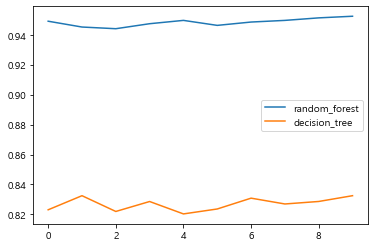

In [23]:
df = pd.DataFrame({"random_forest":rf_cv_scores, "decision_tree":dt_cv_scores})
df.plot()

### (2) 사례1 : 독버섯 데이터

+ https://archive.ics.uci.edu/ml/datasets/mushroom
    - agaricus-lepiota.data
    
+ 파일명을 "mushrooms.csv" 변경

In [27]:
import urllib.request as req

savedir = "data/mushrooms2.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, savedir)
print("다운로드 완료")

다운로드 완료


In [48]:
mr = pd.read_csv("data/mushrooms.csv", header=None)
print(mr.shape)
mr.head()

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [49]:
#####  결측치 여부

mr.info()
mr.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [50]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [51]:
##### feature와 label로 분리

X = mr.drop(0, axis=1)
y = mr[0]

In [52]:
X.head()
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [53]:
##### feature들의 숫자화

enc_x = LabelEncoder()
for col in X.columns:
    X[col] = enc_x.fit_transform(X[col])
    
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

In [54]:
y
X.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [55]:
##### one hot encoding

X = pd.get_dummies(X, columns=X.columns)

In [57]:
X.shape
X

,1_0,1_1,1_2,1_3,1_4,1_5,2_0,2_1,2_2,2_3,...,21_3,21_4,21_5,22_0,22_1,22_2,22_3,22_4,22_5,22_6
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
##### RandomForest

random_clf = RandomForestClassifier().fit(X_train, y_train)
pred = random_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [61]:
##### Decision Tree

decision_clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = decision_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [62]:
##### KNN

knn_clf = KNeighborsClassifier().fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [65]:
##### Logistic Regression

logistic_clf = LogisticRegression().fit(X_train, y_train)
pred = logistic_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00      1005

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# 3. Gradient Boosting Model

+ 분류와 회귀에서 모두 사용 가능
+ 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사 하강법(Gradient Descent Algorithm))
+ 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도 제공
+ learning_rate 파라미터를 사용하여 오차 보정
+ XG Boost, Light GBM, ...

In [66]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [67]:
?GradientBoostingClassifier

In [68]:
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [79]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [73]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958


<AxesSubplot:>

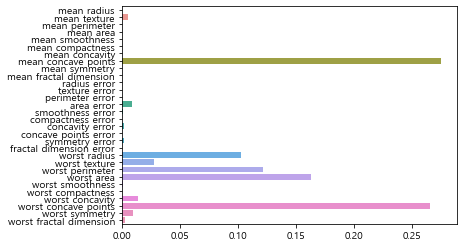

In [80]:
sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

---

In [81]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [82]:
##### RandomForest

clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", clf.score(X_train, y_train))
print("테스트 정확도 : ", clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.936


In [84]:
params = {"n_estimators":[100, 200, 300],
         "max_depth":[2, 3, 4, 5, 6, 7, 8, 9],
         "min_samples_leaf":[1, 2, 3, 4, 5],
         "min_samples_split":[4, 8, 10, 11, 12, 13, 14]}

clf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(clf2, param_grid=params, n_jobs=-1, cv=2)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [89]:
print("최적의 파라미터 : ", grid_cv.best_params_)
print("최고 예측 정확도 : ", grid_cv.best_score_)

최적의 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도 :  0.9453333333333334


In [90]:
grid_cv.score(X_test, y_test)

0.936

In [91]:
##### GradientBoostingModel


clf3 = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", clf3.score(X_train, y_train))
print("테스트 정확도 : ", clf3.score(X_test, y_test))

훈련 정확도 :  0.988
테스트 정확도 :  0.932


In [94]:
params = {"n_estimators":[100, 200, 300],
         "max_depth":[2, 3, 4, 5, 6, 7, 8, 9],
         "min_samples_leaf":[1, 2, 3, 4, 5],
         "min_samples_split":[4, 8, 10, 11, 12, 13, 14]}

clf4 = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(clf4, param_grid=params, n_jobs=-1, cv=2)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [95]:
print("훈련 정확도 : ", grid_cv.score(X_train, y_train))
print("테스트 정확도 : ", grid_cv.score(X_test, y_test))

훈련 정확도 :  0.968
테스트 정확도 :  0.94


### (1) XGBoost

+ 트리 기반의 앙상블 기법
+ 분류에 있어서는 다른 알고리즘보다 좋은 예측 성능을 보여준다.
+ XGBoost는 GBM기반이지만, GBM의 단점인 느린 수행과 과적합 규제 부재등의 문제를 해결
+ 병렬 CPU환경에서 빠르게 학습 가능